In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.signal import periodogram
from scipy.signal import welch

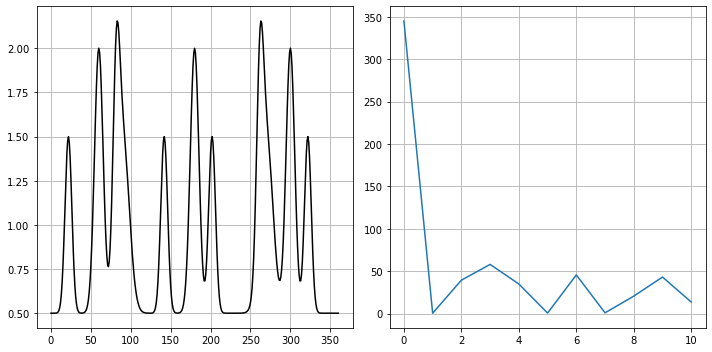

In [37]:
degree = np.arange(0, 361, 1) # 0, 10, 20, ..., 360
radian = degree * np.pi / 180 # degree -> radian

a = np.sin(1*(radian)) ** 50
b = 1.5 * np.sin(1.5*(radian)) ** 50
c = np.sin(3*(radian-3)) ** 20

s = a+b+c+0.5

fft_s = np.abs(np.fft.fft(s))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(degree, s, "k-")
ax[0].grid()
ax[1].plot(fft_s[:11])
ax[1].grid()
fig.tight_layout()
plt.show()

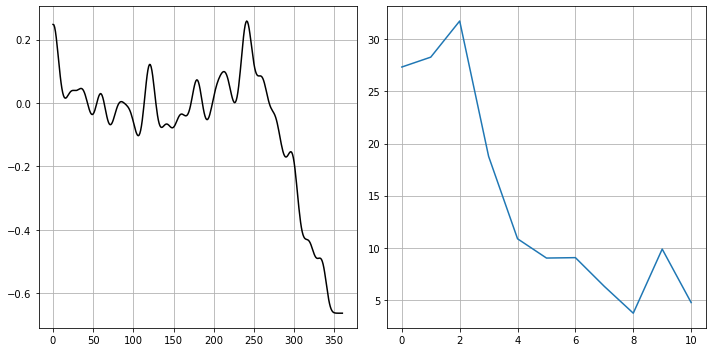

In [38]:
angle_diff = np.arange(0, 361, 1)
corr_val = np.zeros(angle_diff.shape)
int_sqavg = np.square(np.mean(s))

diff_temp = []
corr_values = []
for i in range(len(degree)):
    temp_diff = np.abs(degree[i:] - degree[i])
    corr_temp = s[i:] * s[i]
    
    diff_temp.extend(temp_diff.tolist())
    corr_values.extend(corr_temp.tolist())
    
diff_temp = np.asarray(diff_temp)
corr_values = np.asarray(corr_values)

uni_angle = np.unique(diff_temp)

for ang in uni_angle:
    temp_ind = np.where(diff_temp==ang)
    corr_val[int(ang)] = np.mean(corr_values[temp_ind]) - int_sqavg
    
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(degree, corr_val, "k-")
ax[0].grid()
ax[1].plot(np.abs(np.fft.fft(corr_val))[:11])
ax[1].grid()
fig.tight_layout()
plt.show()

In [ ]:
degree = np.arange(0, 361, 1) # 0, 10, 20, ..., 360
#print(degree)
#print(degree.shape)
radian = degree * np.pi / 180 # degree -> radian
#print(radian)

s = np.sin(2*(radian)) ** 10 # sine function -> elementwise operation
#s += np.sin(1*(radian)) ** 100
#print(s)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(degree, s, "k-") # x-axis -> degree, y-axis -> sin(theta)
ax.set_title("sine function (from 0 to 2pi)")
ax.grid()
fig.tight_layout()
plt.show()

In [ ]:
fft_s = np.abs(np.fft.fft(s))
plt.plot(fft_s[:11])

In [ ]:
n_fold = np.flip(np.argsort(fft_s[:11]))[1:]
print(n_fold)

In [ ]:
ps_s = periodogram(s)
plt.plot(ps_s[1])

In [ ]:
n_fold = np.flip(np.argsort(ps_s[1][:10]))
print(n_fold)